In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data = """
19 21
A B 1
A C 5
A D 2
B E 1
E F 1
F P 50
C G 2
G H 2
H P 2
D I 1
I J 1
J K 1
K L 1
L M 1
M N 1
N O 1
O P 100
D D2 1
D2 D3 1
X Y 5
Y Z 5
A 50
B 5
C 20
D 45
E 4
F 3
G 15
H 10
I 40
J 35
K 30
L 25
M 20
N 15
O 5
D2 50
D3 50
P 0
X 99
Y 88
Z 77
A P
"""

In [3]:
lines = data.strip().split('\n')

header = lines[0].split()
n_nodes = int(header[0])
n_edges = int(header[1])

edge_lines = lines[1:1+ n_edges]
node_lines = lines[1 + n_edges: -1]

start_node = lines[-1].split()[0]
end_node = lines[-1].split()[1]

In [4]:
G = nx.DiGraph()

In [5]:
for line in edge_lines:
    parts = line.split()
    u = parts[0]
    v = parts[1]
    w = int(parts[2])
    G.add_edge(u, v, weight = w)
    print(f"Link between {u,v,w}")

Link between ('A', 'B', 1)
Link between ('A', 'C', 5)
Link between ('A', 'D', 2)
Link between ('B', 'E', 1)
Link between ('E', 'F', 1)
Link between ('F', 'P', 50)
Link between ('C', 'G', 2)
Link between ('G', 'H', 2)
Link between ('H', 'P', 2)
Link between ('D', 'I', 1)
Link between ('I', 'J', 1)
Link between ('J', 'K', 1)
Link between ('K', 'L', 1)
Link between ('L', 'M', 1)
Link between ('M', 'N', 1)
Link between ('N', 'O', 1)
Link between ('O', 'P', 100)
Link between ('D', 'D2', 1)
Link between ('D2', 'D3', 1)
Link between ('X', 'Y', 5)
Link between ('Y', 'Z', 5)


In [6]:
for line in node_lines:
    parts = line.split()
    node = parts[0]
    h_value = int(parts[1])

    G.nodes[node]['h'] = h_value

In [7]:
layers = {}
for n in G.nodes():
    layers[n] = 0

In [8]:
sorted_nodes = list(nx.topological_sort(G))

In [9]:
for node in sorted_nodes:
    current_depth = layers[node]

    for child in G.successors(node):
        if layers[child] < current_depth + 1:
            layers[child] = current_depth + 1

In [10]:
list(G.successors('E'))

['F']

In [11]:
for node, depth in layers.items():
    G.nodes[node]['subset'] = depth
    G.nodes[node]['vitoshacademy'] = depth * 7

In [12]:
G.nodes['P']

{'h': 0, 'subset': 9, 'vitoshacademy': 63}

In [13]:
start_node

'A'

In [14]:
node_colors = []
for n in G.nodes():
    if n == start_node:
        node_colors.append("orange")
    elif n == end_node:
        node_colors.append("red")
    # elif n in ['X', 'Y', 'Z']:
    #     node_colors.append("purple")
    else:
        node_colors.append('lightblue')

In [15]:
node_colors

['orange',
 'lightblue',
 'lightblue',
 'lightblue',
 'lightblue',
 'lightblue',
 'red',
 'lightblue',
 'lightblue',
 'lightblue',
 'lightblue',
 'lightblue',
 'lightblue',
 'lightblue',
 'lightblue',
 'lightblue',
 'lightblue',
 'lightblue',
 'lightblue',
 'lightblue',
 'lightblue']

In [16]:
node_labels = {}
edge_labels = nx.get_edge_attributes(G, "weight")
for n in G.nodes():
    h_val = G.nodes[n].get('h', '?')
    node_labels[n] = f"{n}\n(h={h_val})"

In [17]:
edge_labels

{('A', 'B'): 1,
 ('A', 'C'): 5,
 ('A', 'D'): 2,
 ('B', 'E'): 1,
 ('C', 'G'): 2,
 ('D', 'I'): 1,
 ('D', 'D2'): 1,
 ('E', 'F'): 1,
 ('F', 'P'): 50,
 ('G', 'H'): 2,
 ('H', 'P'): 2,
 ('I', 'J'): 1,
 ('J', 'K'): 1,
 ('K', 'L'): 1,
 ('L', 'M'): 1,
 ('M', 'N'): 1,
 ('N', 'O'): 1,
 ('O', 'P'): 100,
 ('D2', 'D3'): 1,
 ('X', 'Y'): 5,
 ('Y', 'Z'): 5}

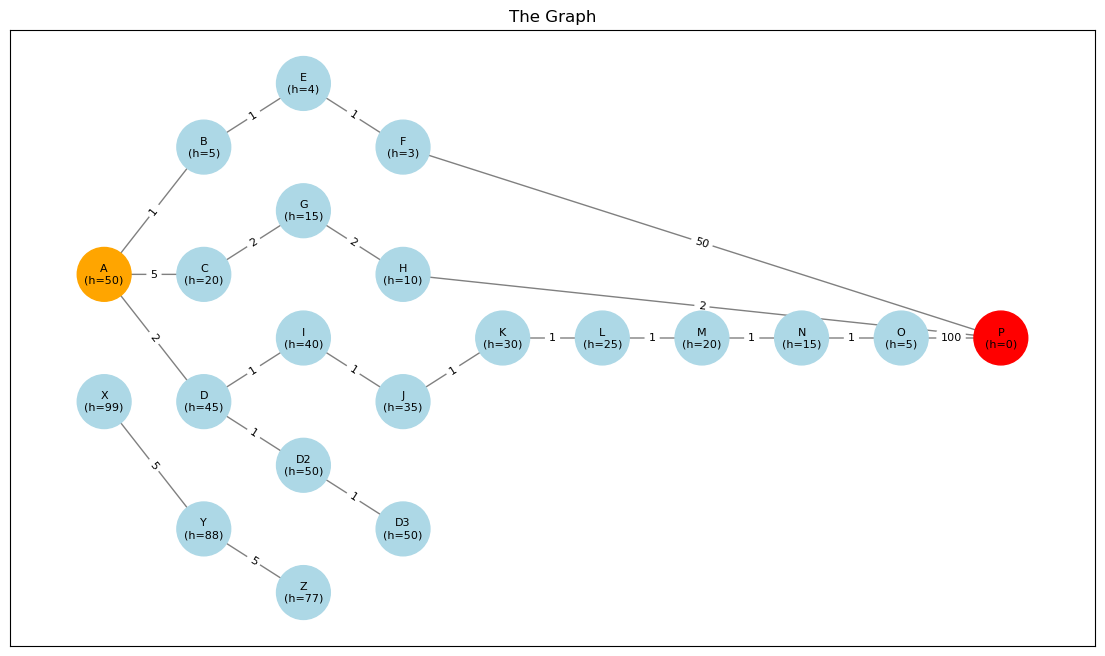

In [18]:
plt.figure(figsize = (14, 8))
pos = nx.multipartite_layout(G, subset_key='subset')
nx.draw_networkx_nodes(G, pos, node_color = node_colors, node_size = 1500)    
nx.draw_networkx_edges(G, pos, edge_color = 'gray', arrowsize = 20)
nx.draw_networkx_labels(G, pos, labels = node_labels, font_size = 8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size = 8)
plt.title("The Graph")
plt.show()

# Bonus - All in 1 single function!

In [19]:
data = """
2 5
A B 1
A C 5
A D 10
D P 15
A P 100
A 50
A P
"""

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_graph_plot(data_string):
    lines = data_string.strip().split('\n')

    header = lines[0].split()
    n_edges = int(header[1])

    edge_lines = lines[1 : 1 + n_edges]
    node_lines = lines[1 + n_edges : -1]
    
    path_info = lines[-1].split()
    start_node = path_info[0]
    end_node = path_info[1]

    G = nx.DiGraph()

    for line in edge_lines:
        parts = line.split()
        u, v, w = parts[0], parts[1], int(parts[2])
        G.add_edge(u, v, weight=w)

    for line in node_lines:
        parts = line.split()
        node = parts[0]
        h_value = int(parts[1])
        if node not in G:
            G.add_node(node)
        G.nodes[node]['h'] = h_value

    layers = {n: 0 for n in G.nodes()}
    
    try:
        sorted_nodes = list(nx.topological_sort(G))
        for node in sorted_nodes:
            current_depth = layers[node]
            for child in G.successors(node):
                # Push child to the right if needed
                if layers[child] < current_depth + 1:
                    layers[child] = current_depth + 1
    except nx.NetworkXUnfeasible:
        # Problem if graph has a cycle
        pass

    for node, depth in layers.items():
        G.nodes[node]['subset'] = depth

    node_colors = []
    for n in G.nodes():
        if n == start_node:
            node_colors.append("orange")
        elif n == end_node:
            node_colors.append("red")
        else:
            node_colors.append('lightblue')

    node_labels = {}
    for n in G.nodes():
        h_val = G.nodes[n].get('h', '?')
        node_labels[n] = f"{n}\n(h={h_val})"
        
    edge_labels = nx.get_edge_attributes(G, "weight")

    fig, ax = plt.subplots(figsize=(14, 8))
    
    pos = nx.multipartite_layout(G, subset_key='subset')
    
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500, ax=ax)    
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrowsize=20, ax=ax)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, ax=ax)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, ax=ax)
    
    ax.set_title(f"Graph Visualization: {start_node} to {end_node}")
    ax.axis('off')
    
    return fig

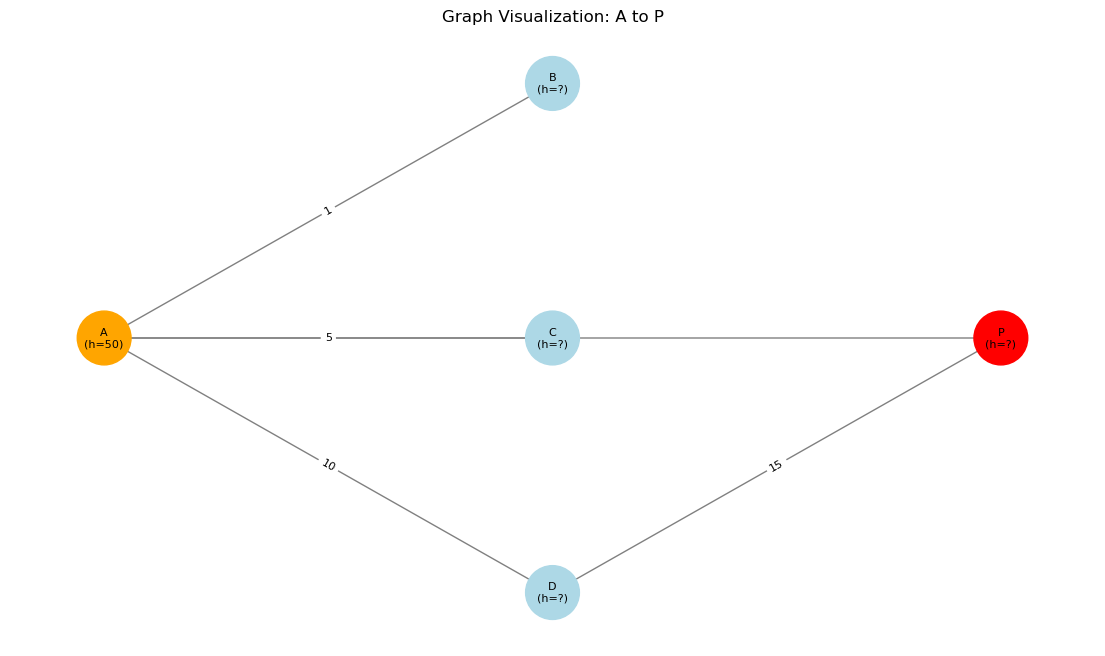

In [22]:
data = """
2 5
A B 1
A C 5
A D 10
D P 15
A P 100
A 50
A P
"""
figure_object = generate_graph_plot(data)
plt.show()